In [1]:
using LinearAlgebra

function GaussLegendre(n)
    # Reference: Golub-Welsch Calculation of Gauss Quadrature Rules, 1968
    # 3-term recurrence coeffs (normalized)
    beta = .5 ./ sqrt.(1 .- (2.0*collect(1:n-1)) .^(-2.0))  
    T = SymTridiagonal(zeros(n),beta)
    eigT = eigen(T)
    x, V = eigT.values, eigT.vectors
    ind = sortperm(x)
    x = x[ind]                            # Legendre points
    w = 2*V[1,ind].^2;                      # Quadrature weights
    return x,w
end


GaussLegendre (generic function with 1 method)

Check the accuracy of $f(x) = (l+1)x^l$.

$\int_{-1}^{1} f(x) dx = 2$ if $l$ is even and $0$ if $l$ is odd.

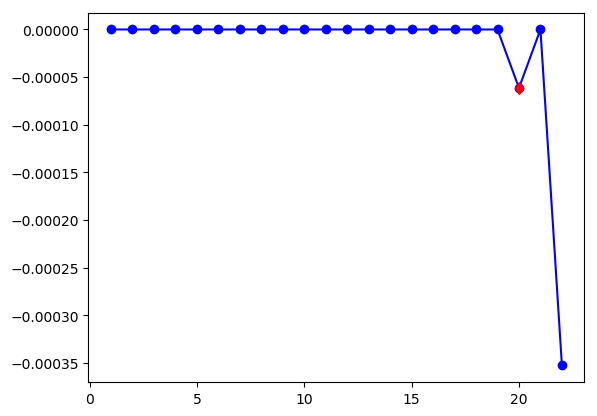

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FA20D30>

In [2]:
using PyPlot

let
    n = 10
    x,w = GaussLegendre(n)

    npoly = 2*n+2
    err = zeros(npoly)
    for l = 1 : npoly
        f = (l+1) * x .^l
        intf = sum(f .* w)
        if(mod(l,2)==0)
            intfexact = 2.0
        else
            intfexact = 0.0
        end
        err[l] = intf - intfexact 
    end

    plot(1:npoly,err,"b-o")
    plot(2*n,err[2*n],"rd")
end

Check the accuracy of $f(x) = \cos(x)$.

$\int_{-1}^{1} f(x) dx = 2\sin(1)$.

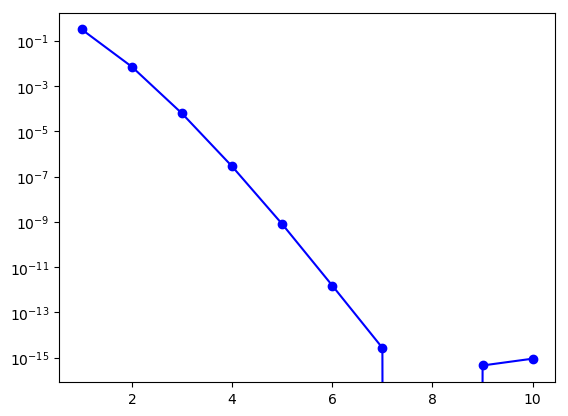

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FBC4080>

In [3]:
let
    intfexact = 2*sin(1.0)

    npoint = 10
    err = zeros(npoint)
    for l = 1 : npoint
        x,w = GaussLegendre(l)
        f = cos.(x)
        intf = sum(f.*w)
        err[l] = abs(intf - intfexact)
    end

    using PyPlot
    semilogy(1:npoint,err,"b-o")
end

### Comparison with trapezoidal rule

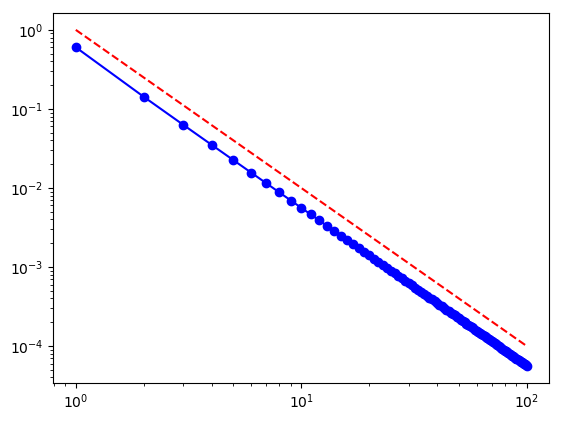

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000034FC4E80>

In [4]:
let
    intfexact = 2*sin(1)

    npoint = 100
    err = zeros(npoint)
    for l = 1 : npoint
        x = range(-1.0,stop=1.0,length=l+1)
        h = x[2]-x[1]
        f = cos.(x)
        intf = sum(0.5*(f[1:end-1]+f[2:end]))*h
        err[l] = abs(intf - intfexact)
    end

    using PyPlot
    loglog(1:npoint,err,"b-o")
    loglog(1:npoint,collect(1:npoint).^(-2.0),"r--")
end